## Tutorial 5 - Approximation Error and Estimation Error

**Objectives:**

* To understand the concept of approximation error and estimation error.
* To show the approximation error and estimation error in practical examples.


**Instructions:**
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "Lab05.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "tutorial5.ipynb" file
* Complete exercises in "Lab05.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


**Authors:**
* Kloe and Lydia


* Adapted from COMP5328 at USYD in 2018 S2

## 1. Approximation Error and Estimation Error
* Let $X$ and $Y$ be variables of features and labels (real values or numerical categorical values), respectively. We also denote $S=\{(X_1,Y_1),\cdots,(X_n,Y_n)\}$ as a training sample with sample size $n$. This training sample is assumed to drawn independently according to the distribution $P(X,Y)$.


* Let $h$ be a hypothesis function which tries to fit the data. For example, in classification and regression, a hypothesis function is a mapping from input features to labels; that is, $h:X\mapsto Y$. We denote $\mathcal{H}$ as a predefined Hypothesis class. 

### 1.1 Loss Function and Risk
* To measure the performance of each hypothesis function on data fitting, loss function is introduced. For example, in classification, loss functions such as 0-1 loss measure the error between the true labels and predicted labels. We denote the loss function as $\ell(X,Y,h)$.


* Given a loss function and a hypothesis function, the $\textbf{expected risk}$ is defined as $R(h)=\mathbb{E}\left[\ell(X,Y,h)\right]=\int_{X,Y} P(X,Y)\ell(X,Y,h)dXdY$.


* In fact, we only have access to training examples drawn according to the distribution $P(X,Y)$. Thus, we approximate the expected risk using the $\textbf{empirical risk}$; that is, $R_S(h) = \sum_{i=1}^n \ell(X_i,Y_i,h)$.


* Viewing $\{(X_1,Y_1),\cdots,(X_n,Y_n)\}$ as independently and identically distributed random variables, then $R(h)=\mathbb{E}\left[R_S(h)\right]$. 

### 1.2 The Target Concept, the Best Hypothesis in the Hypothesis Class, and the Learned Hypothesis
* The target concept $c$ is the best hypothesis function in the universal function space; that is, $c=\arg\min_{h} R(h)$.


* The best hypothesis function $h^*$ in the hypothesis class is $h^*=\arg\min_{h\in \mathcal{H}} R(h)$.


* The learned hypothesis function $h_S$ is obtained by minimizing the empiricial risk; that is, $h_S = \arg\min_{h\in \mathcal{H}} R_S(h)$.

### 1.3 Approximation Error and Estimation Error
* The $\textbf{approximation error}$ is caused by difference between $h^*$ and $c$. Here, we use the difference $R(h^*)-R(c)$ to measure the approximation error.


* The $\textbf{estimation error}$ is caused by $h_S$ and $h^*$. Here, we use the difference $R(h_S)-R(h^*)$ to measure the estimation error.


* We can easily see that the difference $R(h_S) - R(c)$ can be decompose to $R(h_S)-R(h^*)+R(h^*)-R(c)$.

### 1.4 Case 1: Target Concept is in the Hypothesis Class
* We first consider the case in which the target concept is included in the predefined hypothesis class $\mathcal{H}$. In this case, $h^*=c$ and the approximation error will be 0.



**Example:**
* Here, we use linear logistic regression as an example to illustrate how the estimation error changes when the number of training examples is increasing. 


* Recall that, in logistic regression, we let $h(x,w) = \log \frac{p(y=1|x,w)}{p(y=-1|x,w)}$. If $p(y=1|x,w)>p(y=-1|x,w)$, $h(x,w)>0$ and $x$ should be classified to $1$; otherwise, $-1$. Here, we define $h(x,w)=0$ as a decision boundary to split the data into two classes. More details about decision boundary can be found at https://en.wikipedia.org/wiki/Decision_boundary.


* In this example, we assume all training data are two dimensional vectors, i.e., $X \in \mathbb{R}^2$. The true decision boundary is set to be $c(X) = X^{\top} \left[\begin{array}{c} 1 \\ -1 \end{array} \right]=0$. If $X^{\top} \left[\begin{array}{c} 1 \\ -1 \end{array} \right]\geq 0$, the data is labelled as $1$; otherwise, $-1$. 


* We also assume the predefined hypothesis class is linear; that is, $h(X,w) = X^{\top} w$. We can easily see, the target concept $c(X) = X^{\top} \left[\begin{array}{c} 1 \\ -1 \end{array} \right]$ is included in the predefined hypothesis class.



* The visualization of the training data is shown as follows:

#### 1.4.1 Visualization of the Training Data

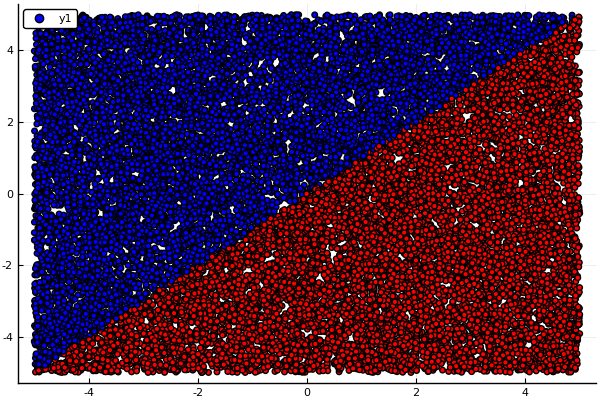

In [2]:
using Plots, LinearAlgebra

nsample = 20000
X = -5 .+ 10*rand(2,nsample) # .+ for element-wise calculation 
Y = zeros(nsample)
for i in 1:nsample
    if X[1,i] - X[2,i] >= 0
        Y[i] = 1
    else
        Y[i] = -1
    end
end

pyplot()  # Switch to using the PyPlot.jl backend
plot(X[1,:], X[2,:], seriestype=:scatter,color =[ifelse(X[1,i]- X[2,i] > 0 ,"red","blue") for i in 1:nsample])

#### 1.4.2 0-1 Loss and Empirical Risk
* According to tutorial 2, we use the function $\textrm{sign}\left(\frac{1}{1+\exp(-X^{\top}w)}-\frac{1}{2}\right)$ as a classifier. Here, $\textrm{sign}(Z)=1$ if $Z\geq 1$; otherwise, $\textrm{sign}(Z)=-1$. This is equivalent to $\textrm{sign}\left(X^{\top}w\right)$ (Please check by yourself).


* Note: For $\textrm{sign}(Z)$, the particular choice of $\textrm{sign}(0)$ is not important.


* The 0-1 loss function is defined as $1\left(Y\neq \textrm{sign}\left(X^{\top}w\right)\right)$ where $1(Z)=1$ if $Z$ is true; otherwise, $1(Z)=0$.

** Exercise 1.4.1 **
* Given the estimated parameters, compute the empirical risk.

In [3]:
function empiricalRisk(X,Y,w)
    """Compute the empirical risk of hypothesis function with parameter w
    Input:
        X: array, shape = [d,n]
        Y: array, shape = [n]
        w: array, shape = [d]
    Output:
        risk: real value
            The empirical risk of this hypothesis function with parameter w.
    """
    n = length(Y)
    
    tmp = X'*w
    tmp = tmp.*Y
    
    errors = [ifelse(tmp[i]<=0,1,0) for i in 1:n]
    risk = sum(errors)*1.0/n
    
    return risk
end

w = zeros(2)
w[1],w[2] = 1,-1
print(empiricalRisk(X,Y,w))

0.0

#### 1.4.2 Linear Logistic Regression
** Exercise 1.4.2 **
* Given the training data, estimate the parameters of hypothesis function by using gradient descent method.

In [4]:
function linearLR(X,Y,lr,maxiter,tol)
    """Estimate parameters of hypothesis function.
    Input: 
       X: array, shape = [d, n]
       Y: array, shape = [n]
       lr: real value
       maxiter: int
       tol: real value.
    Output:
       w: array, shape = [d]
    """
    # initialise parameters
    dim,n = size(X)
    w = 0.01*rand(dim,1)
    
    # we use the norm of gradient as a stop criteria.
    diff_ = Inf
    iters_ = 0
    while (iters_ < maxiter) & (diff_ > tol)
        tmp = zeros(n,1)
        for i in 1:n
            u = 1.0/(1.0+exp(-dot(X[:,i],w)))
            if Y[i] == 1
                tmp[i] = u-1
            else
                tmp[i] = u
            end
        end
        grad = X*tmp
        
        w_new = w - lr*grad
        diff_ = norm(grad)^2
        
        w = w_new
        iters_+=1
    end
    
    return w[:]
end

linearLR (generic function with 1 method)

#### 1.4.2 Approximation Error and Estimation Error
* In this example, as mentioned above, the target concept is included in the predefined hypothesis function. Then the approximation error is 0. We mainly study the estimation error which is caused by the difference between $h_S$ and $h^*$.


* Further, it is easy to see the expected risk $R(c)=R(h^*)=0$ because the target concept can correctly classify all data. Then, $R(h_S) - R(h^*) = R(h_S)$ which measures the estimation error. We can thus study whether the estimation error converges to 0 when the sample size increases to $+\infty$ by using the term $R(h_S)$.



* However, we have no knowledge of distribution $P(X,Y)$. Thus, in this example, we sample a large amount of data and use the empirical risk to approximate $R(h_S)$.


** Exercise 1.4.3 **
* Given training data with increasing sample sizes, study the convergence of the estimation error.

Now we begin the estimation of sample size: 10
Now we begin the estimation of sample size: 50
Now we begin the estimation of sample size: 100
Now we begin the estimation of sample size: 500
Now we begin the estimation of sample size: 1000
Now we begin the estimation of sample size: 5000
Now we begin the estimation of sample size: 10000


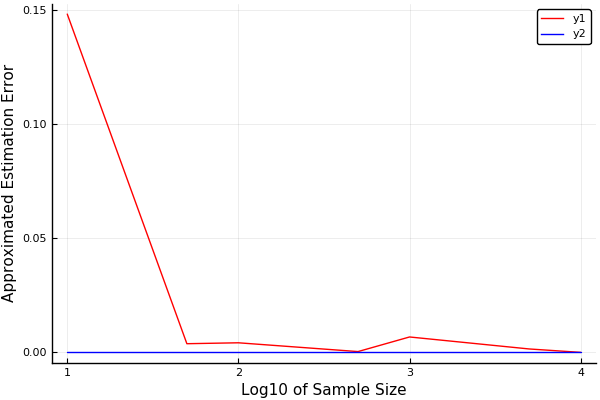

In [6]:
using Random 

num = [10,50,100,500,1000,5000,10000]
risk_list = []

for n in num
    println("Now we begin the estimation of sample size: $(string(n))")
    arr = collect(1:nsample)
    rng = MersenneTwister(1234)
    shuffle!(rng, arr)
    arr = arr[1:n]
    new_x = X[:,arr]
    new_y = Y[arr]
    
    w = linearLR(new_x,new_y,1e-4,500,1e-8)
    
    # think about: why shall we use X and Y rather than the newly sampled data to compute the empirical risk
    approx_estimation_error = empiricalRisk(X,Y,w)
    push!(risk_list,approx_estimation_error)
  
end

pyplot()
plot(log10.(num), risk_list, color = "red",seriestype=:line,xaxis="Log10 of Sample Size", yaxis="Approximated Estimation Error")
plot!(log10.(num), zero(num), color = "blue",seriestype=:line)

### 1.5 Case 2: Target Concept is Not in the Hypothesis Class
* Second, we consider the case in which the target concept is not included in the predefined hypothesis class $\mathcal{H}$. In this case, $h^*\neq c$ and the approximation error will not be 0.

** Example: **
* Here, we use linear regression as an example.


* We set the target concept as $y = x^2$ where $x \in [0,1]$.


* We assume the hypothesis function is linear; that is $h(x,\beta_0,\beta_1) = \beta_0 x+\beta_1$. Then, it is easy to see that the target concept is not included in the predefined hypothesis class. Therefore the approximation error is not 0.

#### 1.5.1 Visualization of the Training Data

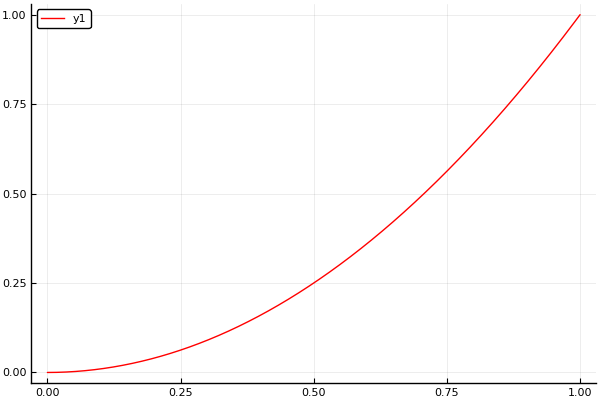

In [7]:
nsample = 20000
X = rand(nsample)
Y = X.^2

pyplot()
plot(X,Y,seriestype=:line,color = "red")

#### 1.5.2 Square Loss and Empirical Risk
* In linear regression, we exploit square loss to evaluate a hypothesis function; that is $\ell(X,Y,h) = (Y-h(X))^2$.

**Exercise 1.5.1**
* Given the training data and estimated paramters, compute the empirical risk.

In [8]:
function empiricalRiskSquareLoss(X,Y,beta_0,beta_1)
    """Compute the empirical risk of hypothesis function with parameter w
    Input:
        X: array, shape = [n]. Features
        Y: array, shape = [n]. Labels
        beta_0, beta_1: real values. Parameter of the hypothesis function
    Output:
        risk: real values. Empirical risk of this hypothesis function with parameter w
    """
    target = beta_0 .* X .+ beta_1
    return sum((target - Y).*(target-Y))/length(Y)
end

print(empiricalRiskSquareLoss(X,Y,1,0))

0.03324803602597753

#### 1.5.3 Linear Regression
** Exercise 1.5.2 **
* Given the training data, estimate the parameters of hypothesis function by using least square method.

In [9]:
function linearRegression(X,Y)
    """Estimate parameters of hypothesis function"""
    n = length(Y)
    mean_X = sum(X)/n
    mean_Y = sum(Y)/n
    
    den = sum([(x_i - mean_X)^2 for x_i in X])
    mol = sum([(X[i] - mean_X).*(Y[i] - mean_Y) for i in 1:n])
    
    beta_0 = mol/den
    beta_1 = mean_Y - beta_0 * mean_X
    
    return beta_0, beta_1
end

beta_0, beta_1 = linearRegression(X,Y)
println(empiricalRiskSquareLoss(X,Y,beta_0,beta_1))
println(beta_0)
println(beta_1)
    

0.005566043922469101
1.0029606020174853
-0.1678616188452604


#### 1.5.4 The Approximation Error and Estimation Error
* In this example, we are able to compute the approximation error. Recall that the approximation error is measured by $R(h^*) - R(c)=R(h^*)$ because the target concept outputs the exact label for each feature and the corresponding expected risk $R(c)=0$.


* We can minimze $R(h) = \int_{0}^1 \frac{1}{1-0} (x^2 - \beta_0 x - \beta_1)^2 dx = \int_{0}^1 (x^2 - \beta_0 x - \beta_1)^2 dx$ to achieve the best hypothesis function $h^*$ in the linear hypothesis class. Then we can compute the approximation error $R(h^*)$.


* Note that the data are assumed to be uniformly sampled from $[0,1]$ and the probability density function of $X$ is $p(X)=1$ if $0\leq X\leq 1$; otherwise $p(X)=0$.

** Exercise 1.5.3**
* Compute the parameters of the best hypothesis function $h^*$ and the approximation error.


* Hint: (1) The form of $R(h)$ can be first computed. We can obtain $R(h)=\frac{1}{5}-\frac{\beta_0}{2}-\frac{2\beta_1}{3} + \beta_0 \beta_1 + \frac{\beta_0^2}{3} + \beta_1^2$. The computation of integral can be found at https://en.wikipedia.org/wiki/Integral.

* (2) Let the gradients of $R(h)$ with respect to $\beta_0$ and $\beta_1$ to be 0. We can find the parameters of the best hypothesis function. 


* The results are: $\beta_{0}^*=1$, $\beta_{1}^*=-\frac{1}{6}$, and $R(h^*) = \frac{1}{180}$.

** Exercise 1.5.4**
* Increase the number of training examples from 10 to 1000 with step 10. Then show the relationship between the difference $R(h_S)-R(c)$ and sample size.


* Note that $R(c) = 0$ because the target concept outputs the exact label for each feature.


* Note that we use empirical risk to approximate $R(h_S)$ as in the example of linear logistic regression.

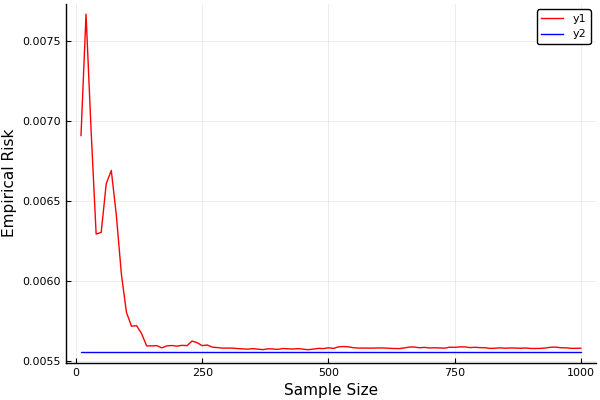

In [32]:
num = floor.(Int,range(10, stop = 1000, length = 100) |> collect)
risk_list = []

for n in num
    arr = collect(1:nsample)
    rng = MersenneTwister(1234)
    shuffle!(rng, arr)
    arr = arr[1:n]
    new_x = X[arr]
    new_y = Y[arr]
    
    beta_0,beta_1 = linearRegression(new_x,new_y)
    
    empirical_risk = empiricalRiskSquareLoss(X,Y,beta_0,beta_1)
    push!(risk_list,empirical_risk)
end

pyplot()
plot(num,risk_list,seriestype=:line,color = "red",xaxis = "Sample Size",yaxis = "Empirical Risk")
plot!(num,ones(length(num))*(1.0/180),seriestype=:line,color="blue")
    
    

** Remark **
* We can see the empirical risk converges to $R(h^*)$ but will never approach to 0 because the target concept is not included in the predefined hypothesis function.